## Loading and using a trained model
Notebook demonstrating how to load a JointVAE model and use it for various things.

In [150]:
from utils.load_model import load

path_to_model_folder = './trained_models/mnist_cauchy_50_epochs_scale=1/'

model = load(path_to_model_folder)

### Look at architecture and latent spec

In [151]:
# Print the latent distribution info
print(model.latent_spec)

{'cont': 10, 'disc': [10]}


In [152]:
# Print model architecture
print(model)

VAE(
  (img_to_features): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
  )
  (features_to_hidden): Sequential(
    (0): Linear(in_features=1024, out_features=256, bias=True)
    (1): ReLU()
  )
  (fc_mean): Linear(in_features=256, out_features=10, bias=True)
  (fc_log_var): Linear(in_features=256, out_features=10, bias=True)
  (fc_alphas): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (latent_to_features): Sequential(
    (0): Linear(in_features=20, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=1024, bias=True)
    (3): ReLU()
  )
  (features_to_img): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv

### Visualize various aspects of the model

In [153]:
from viz.visualize import Visualizer as Viz

# Create a Visualizer for the model
viz = Viz(model)
viz.save_images = False  # Return tensors instead of saving images

#### Samples
Plot generated samples from the model

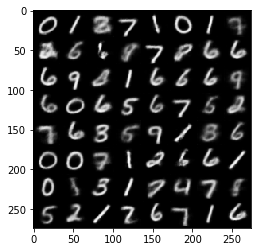

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt

samples = viz.samples()
plt.imshow(samples.numpy()[0, :, :], cmap='gray')
plt.imsave('generated_samples_fromthemodel.png',samples.numpy()[0, :, :], cmap='gray')

#### All latent traversals

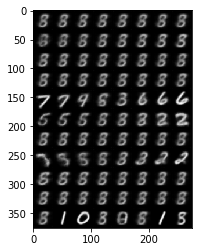

In [155]:
traversals = viz.all_latent_traversals()
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave('all_latent_traversals.png', traversals.numpy()[0, :, :], cmap='gray')

#### Plot a grid of two interesting traversals

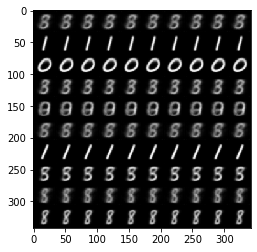

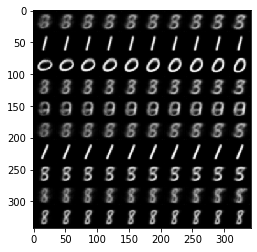

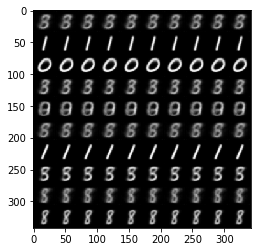

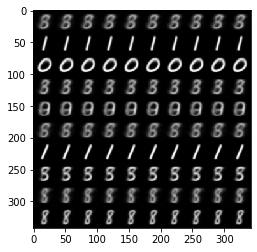

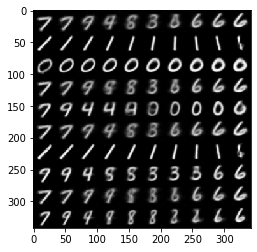

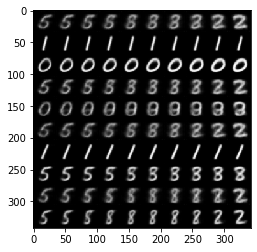

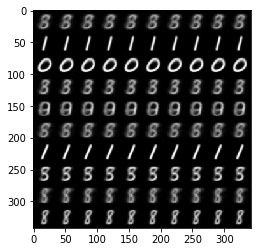

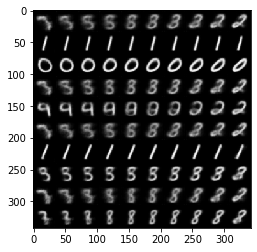

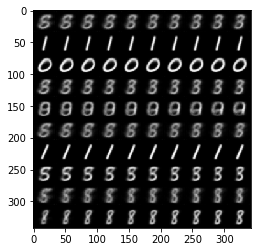

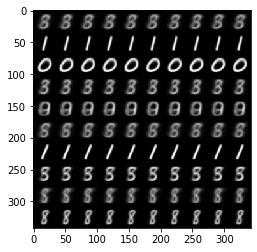

In [156]:
for i in range(10):
    # Traverse 3rd continuous latent dimension across columns and first
    # discrete latent dimension across rows
    traversals = viz.latent_traversal_grid(cont_idx=i, cont_axis=1, disc_idx=0, disc_axis=0, size=(10, 10))
    plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
    plt.show()
    plt.imsave('all_latent_traversals'+str(i)+'.png', traversals.numpy()[0, :, :], cmap='gray')

#### Reorder discrete latent to match order of digits 

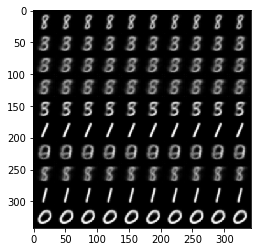

In [157]:
from viz.visualize import reorder_img

ordering = [9, 3, 0, 5, 7, 6, 4, 8, 1, 2]  # The 9th dimension corresponds to 0, the 3rd to 1 etc...
traversals = reorder_img(traversals, ordering, by_row=True)
plt.imshow(traversals.numpy()[0, :, :], cmap='gray')
plt.imsave('reorder_discrete_latent_tomatchorderofdigits.png', traversals.numpy()[0, :, :], cmap='gray')

#### Plot traversal of single dimension

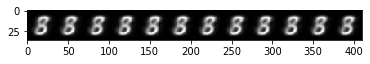

In [158]:
traversal = viz.latent_traversal_line(cont_idx=6, size=12)
plt.imshow(traversal.numpy()[0, :, :], cmap='gray')
plt.imsave('plot_traversal_of_singledimension.png', traversals.numpy()[0, :, :], cmap='gray')

#### Plot reconstructions

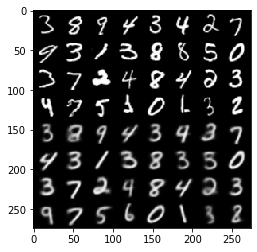

In [159]:
from utils.dataloaders import get_mnist_dataloaders

# Get MNIST test data
_, dataloader = get_mnist_dataloaders(batch_size=32)

# Extract a batch of data
for batch, labels in dataloader:
    break
    
recon = viz.reconstructions(batch, size=(8, 8))

plt.imshow(recon.numpy()[0, :, :], cmap='gray')
plt.imsave('plot_reconstructions.png', recon.numpy()[0, :, :], cmap='gray')

### Encode data
The model can also be used to get encodings of the data

In [160]:
from torch.autograd import Variable
encodings = model.encode(Variable(batch))

In [161]:
# Continuous encodings for the first 5 examples
encodings['cont'][0][:5]

tensor([[-0.0560, -0.3389,  0.0652,  0.1545,  0.4246, -0.4811, -0.0176, -0.5830,
          1.3294, -0.0931],
        [-0.0719, -0.2782, -0.0179, -0.1230, -0.3521,  0.9033,  0.1320,  0.5581,
         -0.4821,  0.1178],
        [-0.0225,  0.0495, -0.0387, -0.0350, -0.8783, -0.1868,  0.0475, -0.2886,
          0.4607, -0.1302],
        [-0.1189, -0.1643,  0.0791, -0.0298, -1.1232, -0.3756, -0.0619,  0.9869,
         -0.2480, -0.1801],
        [-0.0605, -0.6331,  0.0164, -0.0261,  0.4245,  0.1075,  0.0094, -0.0804,
          0.3859,  0.0923]], grad_fn=<SliceBackward>)